In [25]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns

In [7]:
# Reading the CSV FILE 
df = pd.read_csv(r"C:\Users\deepe\Downloads\covid19_sample_data.csv", parse_dates=["Date"])
df

,Country,Date,New_Cases,New_Deaths,Total_Cases,Total_Deaths
0,NaN,2020-01-01,NaN,NaN,96,4
1,India,2020-01-02,113.0,4.0,209,8
2,India,2020-01-03,90.0,5.0,299,13
3,India,2020-01-04,94.0,5.0,393,18
4,India,2020-01-05,103.0,5.0,496,23
...,...,...,...,...,...,...
1825,UK,2020-12-27,86.0,2.0,36100,1816
1826,UK,2020-12-28,105.0,4.0,36205,1820
1827,UK,2020-12-29,93.0,6.0,36298,1826
1828,UK,2020-12-30,101.0,5.0,36399,1831


In [8]:
# checkign the data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Country       1820 non-null   object        
 1   Date          1830 non-null   datetime64[ns]
 2   New_Cases     1811 non-null   float64       
 3   New_Deaths    1817 non-null   float64       
 4   Total_Cases   1830 non-null   int64         
 5   Total_Deaths  1830 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 85.9+ KB


In [ ]:
# By info we know now we also have some data as null and there are in-constitent data type


In [ ]:
# Analysing the data 
df.head() # this will give as 5 starting rows 

# DATA CLEANING

In [11]:
# CHECKING FOR THE MISSING VALUES 
df.isnull().sum()

Country         10
Date             0
New_Cases       19
New_Deaths      13
Total_Cases      0
Total_Deaths     0
dtype: int64

As we can see by above output that we have 3 columns where values are missing 

# Filling the missing values

In [12]:
df['New_Cases'].fillna(0, inplace=True) # this will fill the values in New_Cases
df.head()

,Country,Date,New_Cases,New_Deaths,Total_Cases,Total_Deaths
0,NaN,2020-01-01,0.0,NaN,96,4
1,India,2020-01-02,113.0,4.0,209,8
2,India,2020-01-03,90.0,5.0,299,13
3,India,2020-01-04,94.0,5.0,393,18
4,India,2020-01-05,103.0,5.0,496,23


In [13]:
df['New_Deaths'].fillna(0, inplace=True) # this will fill the values in New_Deaths
df.head()

,Country,Date,New_Cases,New_Deaths,Total_Cases,Total_Deaths
0,NaN,2020-01-01,0.0,0.0,96,4
1,India,2020-01-02,113.0,4.0,209,8
2,India,2020-01-03,90.0,5.0,299,13
3,India,2020-01-04,94.0,5.0,393,18
4,India,2020-01-05,103.0,5.0,496,23


We can still see of the country's name is null but we also need that too bcoz they have some imp data like total_deaths & total cases

In [14]:
df['Country'].fillna('Unknown', inplace = True) # this will fill empty country as Un-known
df.head()

,Country,Date,New_Cases,New_Deaths,Total_Cases,Total_Deaths
0,Unknown,2020-01-01,0.0,0.0,96,4
1,India,2020-01-02,113.0,4.0,209,8
2,India,2020-01-03,90.0,5.0,299,13
3,India,2020-01-04,94.0,5.0,393,18
4,India,2020-01-05,103.0,5.0,496,23


In [15]:
# checking if we do not have any negative values 
#df = df[(df['New_Cases'] >= 0) & (df['New_Deaths'] >= 0)]
df = df[(df['New_Cases'] >= 0) & (df['New_Deaths'] >=0) ]

In [16]:
print(df)

      Country       Date  New_Cases  New_Deaths  Total_Cases  Total_Deaths
0     Unknown 2020-01-01        0.0         0.0           96             4
1       India 2020-01-02      113.0         4.0          209             8
2       India 2020-01-03       90.0         5.0          299            13
3       India 2020-01-04       94.0         5.0          393            18
4       India 2020-01-05      103.0         5.0          496            23
...       ...        ...        ...         ...          ...           ...
1825       UK 2020-12-27       86.0         2.0        36100          1816
1826       UK 2020-12-28      105.0         4.0        36205          1820
1827       UK 2020-12-29       93.0         6.0        36298          1826
1828       UK 2020-12-30      101.0         5.0        36399          1831
1829       UK 2020-12-31       84.0         5.0        36483          1836

[1830 rows x 6 columns]


# Seeking the Insights

In [17]:
# Total cases & death per country 
summary = df.groupby('Country')[['Total_Cases', 'Total_Deaths']].max().sort_values(by='Total_Cases', ascending=False)
print("\nSummary stats per country:")
print(summary)


Summary stats per country:
         Total_Cases  Total_Deaths
Country                           
Brazil         36996          1724
India          36954          1778
Russia         36680          1909
UK             36483          1836
USA            36439          1810
Unknown        33621          1709


In [18]:
# Peak day of new cases per country
peak_cases = df.loc[df.groupby("Country")["New_Cases"].idxmax()][["Country", "Date", "New_Cases"]]
print("\nPeak case days per country:")
print(peak_cases)


Peak case days per country:
      Country       Date  New_Cases
785    Brazil 2020-02-23      128.0
168     India 2020-06-17      132.0
1313   Russia 2020-08-03      130.0
1565       UK 2020-04-11      134.0
368       USA 2020-01-03      131.0
0     Unknown 2020-01-01        0.0


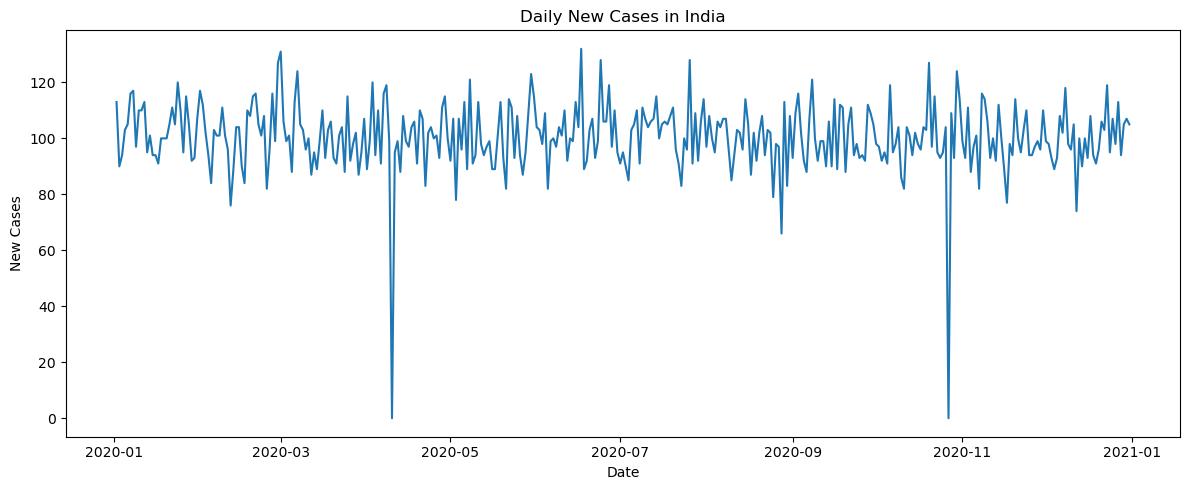

In [26]:
# Plot new cases trend for India
import matplotlib.pyplot as plt
india_data = df[df['Country'] == 'India']
plt.figure(figsize=(12, 5))
sns.lineplot(data=india_data, x='Date', y='New_Cases')
plt.title("Daily New Cases in India")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.tight_layout()
plt.show()

By the graph we can clearly see the new cases 